In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

X_raw = np.array([2013, 2014, 2015, 2016, 2017], dtype=np.int)
y_raw = np.array([12000, 14000, 15000, 16000, 17500], dtype=np.float32)
# min max normalization 可以加速函数的收敛
X = (X_raw - X_raw.min())/(X_raw.max() - X_raw.min())
y = (y_raw - y_raw.min())/(y_raw.max() - y_raw.min())

# 这里遗留一个问题，就是normalization之后回归的系数也会相应的变化，得出的a,b如何还原到之前呢

损失函数为：

 $min_{a,b}L(a,b)=\sum_{i=1}^{N}(ax_i+b-y_i)^2$

a的偏导数为：

$\frac{\partial L}{\partial a} = \sum_{i=1}^{N}2(ax_i+b-y_i)x_i$

b的偏导数为：

$\frac{\partial L}{\partial b} = \sum_{i=1}^{N} 2(ax_i+b-y_i)$

In [13]:
a,b = 0,0
epoch = 1000000
learning_rate = 0.0001

for i in range(epoch):
    y_pred = a * X + b
    # 获得偏导数
    grad_a = 2 * np.dot((y_pred - y_raw),X_raw)
    grad_b = 2 * np.dot((y_pred - y_raw),np.ones(X_raw.shape))
    # 更新参数
    a = a - learning_rate * grad_a
    b = b - learning_rate * grad_b


In [14]:
print(a,b)

20161.93736505294 4815.322357454489


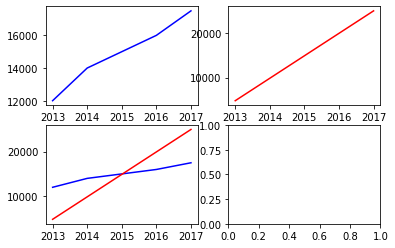

In [19]:
pred_y = X * a + b

fig,axs = plt.subplots(2,2)
axs[0,0].plot(X_raw,y_raw,'b-')
axs[0,1].plot(X_raw,pred_y,'r-')
axs[1,0].plot(X_raw,y_raw,'b-')
axs[1,0].plot(X_raw, pred_y, 'r-')
